In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Aditya/Desktop/Credit Card Approval/credit_card_approval.csv")

In [3]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
JOB                    0
BEGIN_MONTHS           0
STATUS                 0
TARGET                 0
dtype: int64

In [6]:
# Checking balanced / imbalanced Data:

df['TARGET'].value_counts(normalize = True)

0    0.996351
1    0.003649
Name: TARGET, dtype: float64

In [7]:
## finding unique numbers:

for feature in df.columns[:]:
    print (feature,":", len(df[feature].unique()),'lables')

ID : 25134 lables
CODE_GENDER : 2 lables
FLAG_OWN_CAR : 2 lables
FLAG_OWN_REALTY : 2 lables
CNT_CHILDREN : 3 lables
AMT_INCOME_TOTAL : 195 lables
NAME_EDUCATION_TYPE : 5 lables
NAME_FAMILY_STATUS : 5 lables
NAME_HOUSING_TYPE : 6 lables
DAYS_BIRTH : 5206 lables
DAYS_EMPLOYED : 3299 lables
FLAG_MOBIL : 1 lables
FLAG_WORK_PHONE : 2 lables
FLAG_PHONE : 2 lables
FLAG_EMAIL : 2 lables
JOB : 18 lables
BEGIN_MONTHS : 61 lables
STATUS : 8 lables
TARGET : 2 lables


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

In [9]:
## Objective Variables:

object_col = []

for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <=30:
        object_col.append (column)
        print (f"{column} : {df[column].unique()}")
        print (df[column].value_counts())
        print ("================")

CODE_GENDER : ['F' 'M']
F    333832
M    203835
Name: CODE_GENDER, dtype: int64
FLAG_OWN_CAR : ['Y' 'N']
N    306207
Y    231460
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_REALTY : ['N' 'Y']
Y    345471
N    192196
Name: FLAG_OWN_REALTY, dtype: int64
CNT_CHILDREN : ['2+ children' 'No children' '1 children']
No children    343151
1 children     127695
2+ children     66821
Name: CNT_CHILDREN, dtype: int64
NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Secondary / secondary special    358317
Higher education                 153770
Incomplete higher                 20590
Lower secondary                    4556
Academic degree                     434
Name: NAME_EDUCATION_TYPE, dtype: int64
NAME_FAMILY_STATUS : ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Married                 384003
Single / not married     65944
Civil marriage           44083
Separated                31394
Wido

In [12]:
### using dummy variabeles:
df = pd.get_dummies(df,columns = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'],drop_first = True)

In [13]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,5065438,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0,0,1,0
1,5142753,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0,0,0,0
2,5111146,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0,1,1,1
3,5010310,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0,0,1,1
4,5010835,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0,1,1,1


In [14]:
df['CNT_CHILDREN'].value_counts()

No children    343151
1 children     127695
2+ children     66821
Name: CNT_CHILDREN, dtype: int64

In [15]:
## Using ordering variables:
child_dictionary = {'No children': 0,'1 children': 1,'2+ children': 2 }

In [17]:
child_dictionary

{'No children': 0, '1 children': 1, '2+ children': 2}

In [18]:
df['Child'] = df['CNT_CHILDREN'].map(child_dictionary)

In [19]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,Child
0,5065438,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0,0,1,0,2
1,5142753,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0,0,0,0,0
2,5111146,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0,1,1,1,0
3,5010310,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0,0,1,1,1
4,5010835,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0,1,1,1,2


In [20]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    358317
Higher education                 153770
Incomplete higher                 20590
Lower secondary                    4556
Academic degree                     434
Name: NAME_EDUCATION_TYPE, dtype: int64

In [22]:
## Using ordering variables:
edu_dictionary = {'Academic degree': 0,'Lower secondary': 1,'Secondary / secondary special': 2,
                 'Incomplete higher': 3,'Higher education': 4 }

In [23]:
df['Education'] = df['NAME_EDUCATION_TYPE'].map(edu_dictionary)

In [24]:
df['JOB'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: JOB, dtype: int64

In [25]:
job_map = df['JOB'].value_counts().to_dict()

In [26]:
job_map

{'Laborers': 131572,
 'Core staff': 77112,
 'Sales staff': 70362,
 'Managers': 67738,
 'Drivers': 47678,
 'High skill tech staff': 31768,
 'Accountants': 27223,
 'Medicine staff': 26691,
 'Cooking staff': 13416,
 'Security staff': 12400,
 'Cleaning staff': 11399,
 'Private service staff': 6714,
 'Low-skill Laborers': 3623,
 'Secretaries': 3149,
 'Waiters/barmen staff': 2557,
 'HR staff': 1686,
 'IT staff': 1319,
 'Realty agents': 1260}

In [27]:
df['JOB'] = df['JOB'].map(job_map)

In [28]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,Child,Education
0,5065438,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,...,0,67738,-6,C,0,0,1,0,2,2
1,5142753,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,...,0,6714,-4,0,0,0,0,0,0,2
2,5111146,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,...,0,131572,0,C,0,1,1,1,0,4
3,5010310,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,...,0,77112,-3,0,0,0,1,1,1,2
4,5010835,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,...,0,47678,-29,0,0,1,1,1,2,2


In [29]:
df.drop(['CNT_CHILDREN','NAME_EDUCATION_TYPE'], axis = 1, inplace = True)

In [30]:
df.head()

,ID,AMT_INCOME_TOTAL,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,Child,Education
0,5065438,270000.0,Married,With parents,-13258,-2300,1,0,0,0,67738,-6,C,0,0,1,0,2,2
1,5142753,81000.0,Single / not married,House / apartment,-17876,-377,1,1,1,0,6714,-4,0,0,0,0,0,0,2
2,5111146,270000.0,Married,House / apartment,-19579,-1028,1,0,1,0,131572,0,C,0,1,1,1,0,4
3,5010310,112500.0,Married,House / apartment,-15109,-1956,1,0,0,0,77112,-3,0,0,0,1,1,1,2
4,5010835,139500.0,Married,House / apartment,-17281,-5578,1,1,0,0,47678,-29,0,0,1,1,1,2,2


In [31]:
family_map=df['NAME_FAMILY_STATUS'].value_counts().to_dict()
df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].map(family_map)

In [32]:
house_map=df['NAME_HOUSING_TYPE'].value_counts().to_dict()
df['NAME_HOUSING_TYPE']=df['NAME_HOUSING_TYPE'].map(house_map)

In [34]:
status_map=df['STATUS'].value_counts().to_dict()
df['STATUS']=df['STATUS'].map(status_map)

In [35]:
df.head()

,ID,AMT_INCOME_TOTAL,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,Child,Education
0,5065438,270000.0,384003,29351,-13258,-2300,1,0,0,0,67738,-6,226185,0,0,1,0,2,2
1,5142753,81000.0,65944,474177,-17876,-377,1,1,1,0,6714,-4,200930,0,0,0,0,0,2
2,5111146,270000.0,384003,474177,-19579,-1028,1,0,1,0,131572,0,226185,0,1,1,1,0,4
3,5010310,112500.0,384003,474177,-15109,-1956,1,0,0,0,77112,-3,200930,0,0,1,1,1,2
4,5010835,139500.0,384003,474177,-17281,-5578,1,1,0,0,47678,-29,200930,0,1,1,1,2,2


In [38]:
df.FLAG_MOBIL.value_counts()

1    537667
Name: FLAG_MOBIL, dtype: int64

In [39]:
df.drop(['FLAG_MOBIL'], axis = 1, inplace = True)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

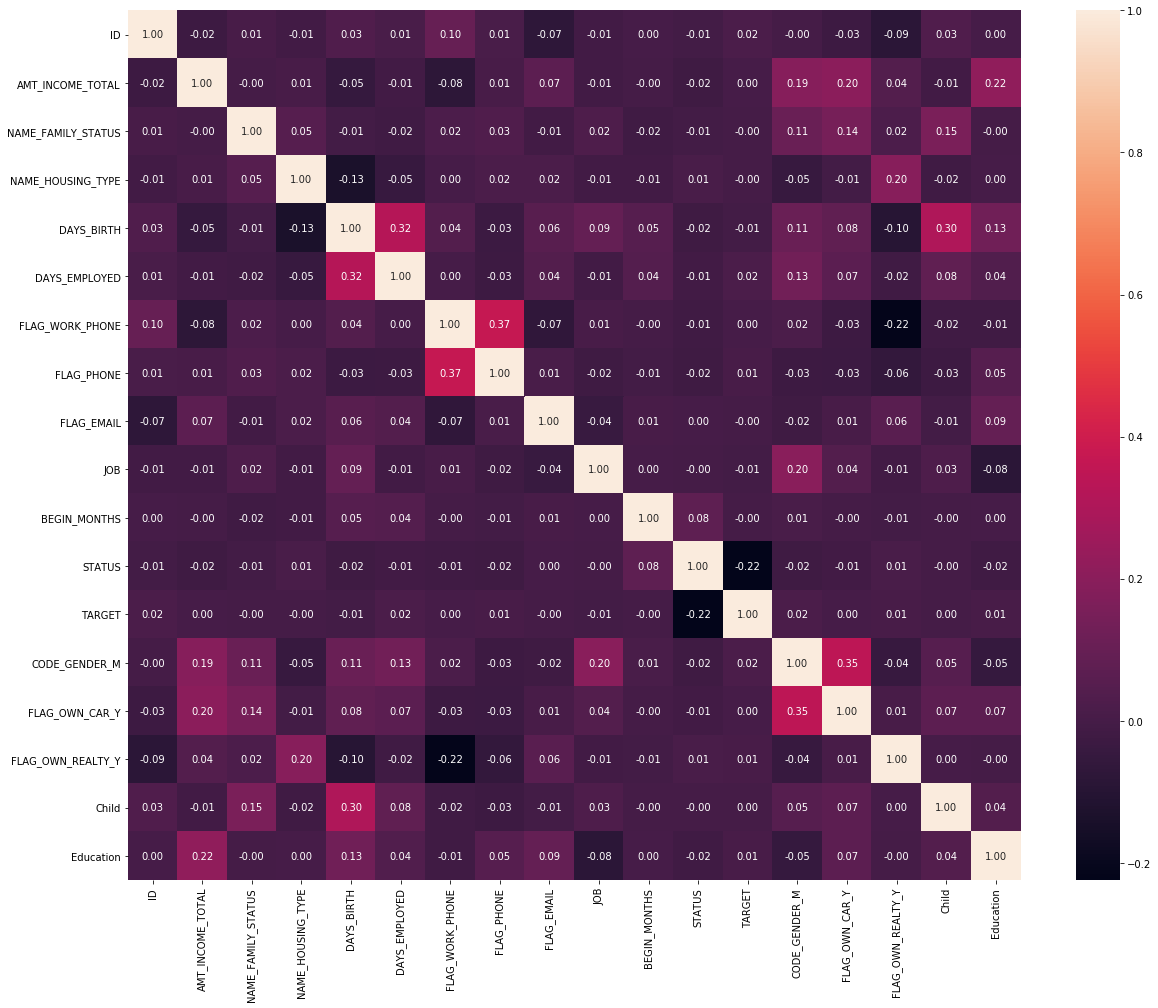

In [40]:
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True,fmt=".2f")

In [42]:
df['TARGET'].value_counts()

0    535705
1      1962
Name: TARGET, dtype: int64

In [43]:
## Independent and dependent Feature:

X = df.drop("TARGET", axis = 1)
y = df.TARGET

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [45]:
X_train.shape

(376366, 17)

## Random Forest:

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[160682      0]
 [     0    619]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160682
           1       1.00      1.00      1.00       619

    accuracy                           1.00    161301
   macro avg       1.00      1.00      1.00    161301
weighted avg       1.00      1.00      1.00    161301



## Oversampling

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
from collections import Counter
Counter(y_train)

Counter({0: 375023, 1: 1343})

In [51]:
os = RandomOverSampler(0.8)
X_train_ns, y_train_ns = os.fit_sample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\Aditya\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 375023, 1: 1343})
The number of classes after fit Counter({0: 375023, 1: 300018})


In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [53]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[160682      0]
 [     0    619]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160682
           1       1.00      1.00      1.00       619

    accuracy                           1.00    161301
   macro avg       1.00      1.00      1.00    161301
weighted avg       1.00      1.00      1.00    161301

